## Биослучайные числа

В данном примере кода мы показываем, как запросить биослучайные числа, сгенерированные бактериями в рамках экспоната выставки "[Человек и нейросеть: кто кого создаёт]", проходящей в период 23 апреля - 25 мая 2025 г.

> За рамками данного временного промежутка API для генерации биослучайных числе будет недоступно.

Для начала, импортируем библиотеки:

In [ ]:
import json
import requests

base_url = "https://art.ycloud.eazify.net:8443/biorandom"

## Получаем последнее биослучайное число

Биослучайные числа (в диапазоне 0-255) генерируются бактериями периодически, примерно за 8-10 секунд. Это время, необходимое для сбора всех 8 бит такого числа на основе 8 последовательных измерений. В ответ на запрос мы получаем число и дату его обновления:

In [2]:
def get_latest():
    res = requests.get(f"{base_url}/get/latest").json()
    return res

get_latest()

{'num': 34, 'timestamp': '2025-04-25 16:06:21'}

## Получаем последние несколько чисел

В рамках API вы также можете получить доступ к нескольким последним числам, до 100 штук. Для этого передаёт требуемое количество чисел:

In [4]:
def get(n=100):
    res = requests.get(f"{base_url}/get/{int(n)}").json()
    return res

res = get()

res

[{'num': 33, 'timestamp': '2025-04-25 16:08:25'},
 {'num': 18, 'timestamp': '2025-04-25 16:08:18'},
 {'num': 160, 'timestamp': '2025-04-25 16:08:09'},
 {'num': 176, 'timestamp': '2025-04-25 16:08:01'},
 {'num': 176, 'timestamp': '2025-04-25 16:07:53'},
 {'num': 8, 'timestamp': '2025-04-25 16:07:45'},
 {'num': 149, 'timestamp': '2025-04-25 16:07:38'},
 {'num': 132, 'timestamp': '2025-04-25 16:07:28'},
 {'num': 50, 'timestamp': '2025-04-25 16:07:19'},
 {'num': 16, 'timestamp': '2025-04-25 16:07:12'},
 {'num': 12, 'timestamp': '2025-04-25 16:07:04'},
 {'num': 80, 'timestamp': '2025-04-25 16:06:55'},
 {'num': 184, 'timestamp': '2025-04-25 16:06:47'},
 {'num': 8, 'timestamp': '2025-04-25 16:06:39'},
 {'num': 40, 'timestamp': '2025-04-25 16:06:31'},
 {'num': 34, 'timestamp': '2025-04-25 16:06:21'},
 {'num': 149, 'timestamp': '2025-04-25 16:06:14'},
 {'num': 10, 'timestamp': '2025-04-25 16:06:06'},
 {'num': 72, 'timestamp': '2025-04-25 16:05:57'},
 {'num': 18, 'timestamp': '2025-04-25 16:05:4

Посмотрим на гистограмму распределения таких чисел:

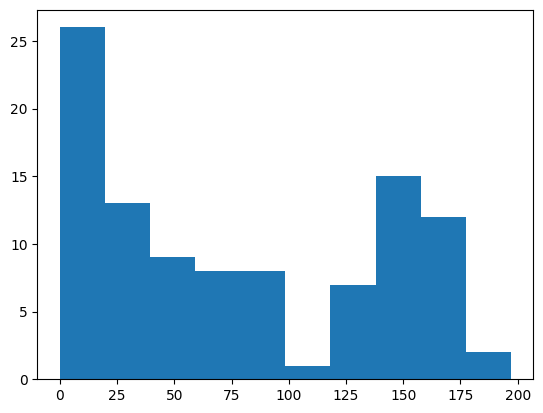

In [6]:
import matplotlib.pyplot as plt

ns = [ x['num'] for x in res ]
plt.hist(ns,bins=10)
plt.show()

Для сравнения, посмотрим на гистограмму псевдослучайных чисел:

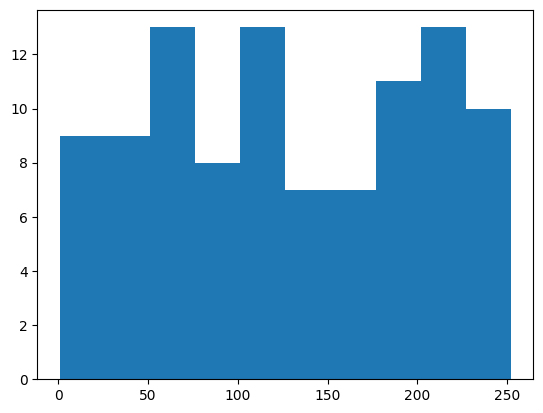

In [8]:
import random
plt.hist([random.randint(0,255) for x in range(100)],bins=10)
plt.show()